# Double Pendulum

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video

%matplotlib notebook

In [2]:
np.finfo(np.longdouble)

finfo(resolution=1e-18, min=-1.189731495357231765e+4932, max=1.189731495357231765e+4932, dtype=float128)

## Numerical integration

# TODO: use more precise data type to avoid violation of conservation of energy

In [3]:
def solve_double_pendulum(y0, t_span, t_eval, m1=1, m2=1, l1=1, l2=1, g=9.81):
  y0 = np.array(y0, dtype=np.longdouble)
  t_span = np.array(t_span, dtype=np.longdouble)
  t_eval = np.array(t_eval, dtype=np.longdouble)
  
  m1, m2, l1, l2, g = np.array([m1, m2, l1, l2, g], dtype=np.longdouble)
  
  def y_prime(t, y):
    theta_1, theta_1_prime, theta_2, theta_2_prime = y

    theta_2_prime_prime = (
      (
        (m1 + m2) / (m2 * l2) *
        (g * (np.sin(theta_2) - np.sin(theta_1) * np.cos(theta_1 - theta_2)) - (l1 * ((theta_1_prime) ** 2) * np.sin(theta_1 - theta_2))) -
        1 / 2 * (theta_2_prime ** 2) * np.sin(2 * (theta_1 - theta_2))
      ) / (np.cos(theta_1 - theta_2) ** 2 - (m1 + m2) / m2)
    )

    theta_1_prime_prime = (
      (theta_1_prime ** 2) * np.tan(theta_1 - theta_2) -
      (g * np.sin(theta_2) + l2 * theta_2_prime_prime) / (l1 * np.cos(theta_1 - theta_2))
    )

    return [
      theta_1_prime,
      theta_1_prime_prime,
      theta_2_prime,
      theta_2_prime_prime,
    ]

  return scipy.integrate.solve_ivp(y_prime,
                                   t_span=t_span,
                                   t_eval=t_eval,
                                   y0=y0,
                                   # DOP853 is more precise than RK45, so conservation of energy is violated less
                                   method="DOP853",
                                   atol=1e-150)

## Plotting

In [4]:
def plot_soln(soln, t_eval):
  theta_1, theta_1_prime, theta_2, theta_2_prime = soln.y
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

  axs[0, 0].set_title("Angular displacement of bob 1")
  axs[0, 0].plot(t_eval, theta_1)

  axs[0, 1].set_title("Angular velocity of bob 1")
  axs[0, 1].plot(t_eval, theta_1_prime)

  axs[1, 0].set_title("Angular displacement of bob 2")
  axs[1, 0].plot(t_eval, theta_2)
  
  axs[1, 1].set_title("Angular velocity of bob 2")
  axs[1, 1].plot(t_eval, theta_2_prime)

<IPython.core.display.Javascript object>


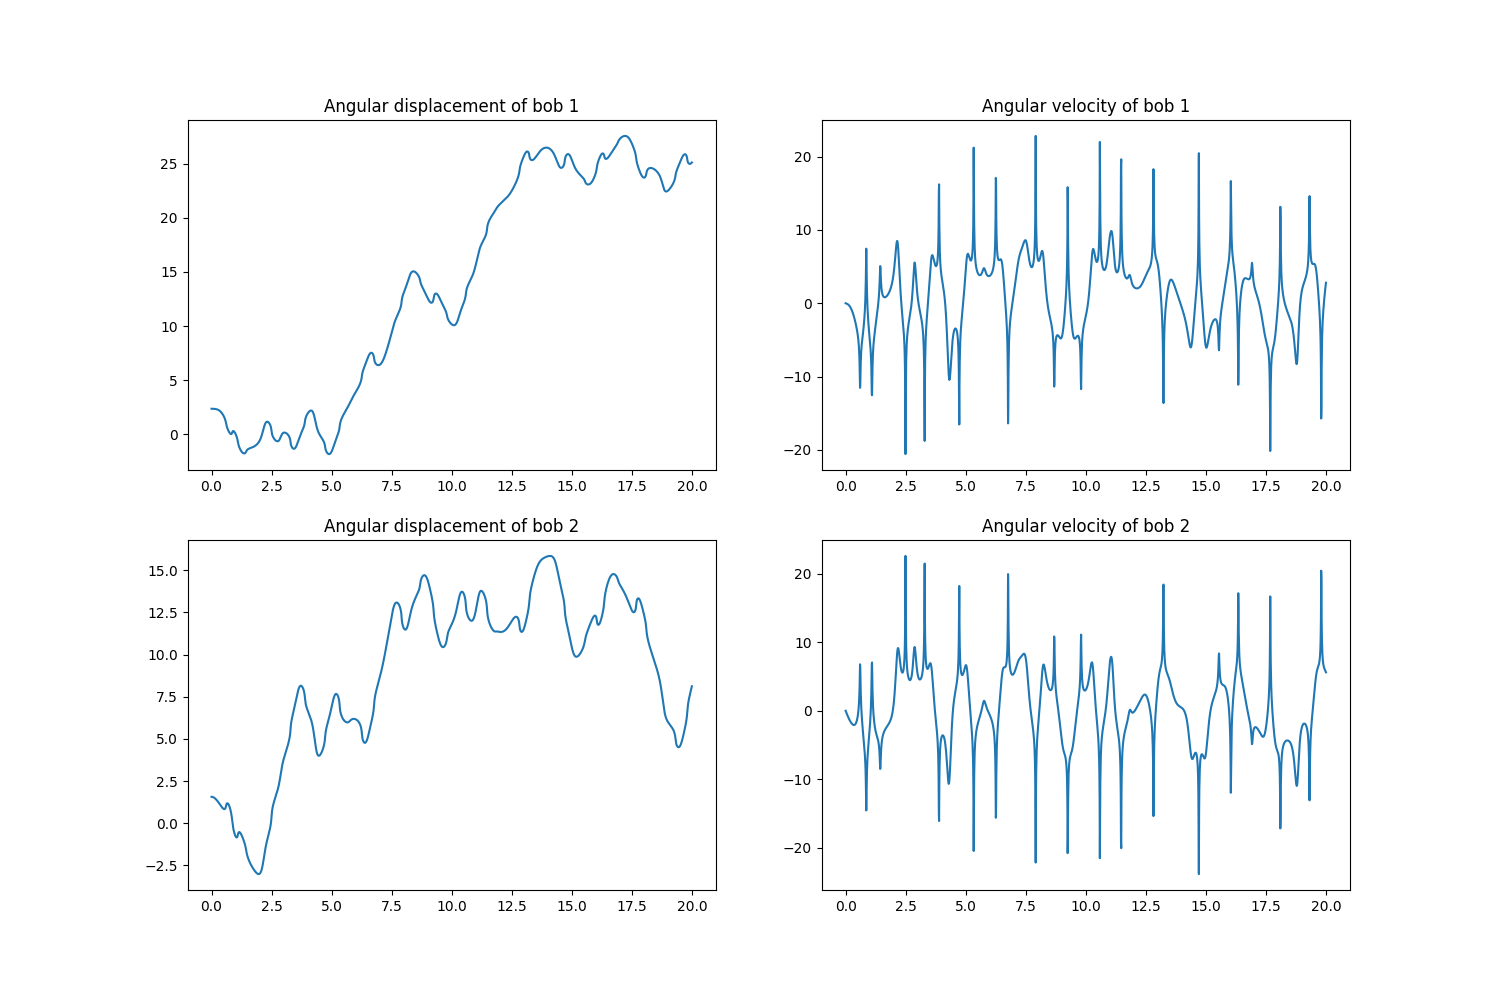

In [5]:
t_span = (0, 20)
dt = 1e-2 # interval between times at which solution values are stored
t_eval = np.arange(*t_span, step=dt)

m1 = 1
m2 = 10
l1 = 1
l2 = 1
g = 9.81

m1, m2, l1, l2, g = np.array([m1, m2, l1, l2, g], dtype=np.longdouble)

# Note: for certain parameter values, the integrator appears to hang
# due to excessively low error tolerance causing it to take very small time steps
# DOP853 freezes with y0=[3 * np.pi / 4, 0, np.pi / 4, 0]
# RK45 freezes with y0=[np.pi / 4, 0, np.pi / 4, 0]

soln_1 = solve_double_pendulum(y0=[3 * np.pi / 4, 0, np.pi / 2, 0],
                               t_span=t_span,
                               t_eval=t_eval,
                               m1=m1, m2=m2, l1=l1, l2=l2, g=g)

plot_soln(soln_1, t_eval)

# soln_2 = solve_double_pendulum(y0=[3 * np.pi / 4 + 1e-15, 0, np.pi / 4, 0],
#                                t_span=t_span,
#                                t_eval=t_eval,
#                                m1=m1, m2=m2, l1=l1, l2=l2, g=g)

# plot_soln(soln_2, t_eval)

In [7]:
theta_1, theta_1_prime, theta_2, theta_2_prime = soln_1.y

ke = 1/2 * (l1 * theta_1_prime) ** 2 * (m1 + m2) + 1/2 * m2 * (l2 * theta_2_prime) ** 2 + m2 * (l1 * theta_1_prime) * (l2 * theta_2_prime) * np.cos(theta_1 - theta_2)
gpe = -g * (l1 * np.cos(theta_1) * (m1 + m2) + m2 * l2 * np.cos(theta_2))
print((ke + gpe).dtype)
for i, te in enumerate(ke + gpe):
  print(soln_1.t[i], te)

float64
0.0 76.30389275784033
0.010000000000000000208 76.30389275784043
0.020000000000000000416 76.30389280667578
0.02999999999999999889 76.303893156841
0.040000000000000000833 76.30389310801901
0.050000000000000002776 76.30389298902264
0.05999999999999999778 76.30389332668076
0.07000000000000000666 76.30389418289975
0.080000000000000001665 76.3038950880668
0.08999999999999999667 76.3038952890891
0.10000000000000000555 76.3038941226045
0.110000000000000000555 76.30389138061531
0.11999999999999999556 76.30388756285652
0.13000000000000000444 76.30388391642988
0.14000000000000001332 76.3038821596349
0.14999999999999999445 76.30388378579366
0.16000000000000000333 76.30388885674647
0.17000000000000001221 76.30389423621463
0.17999999999999999334 76.30382604888317
0.19000000000000000222 76.3035914449597
0.2000000000000000111 76.30336410680138
0.20999999999999999223 76.3032332247626
0.22000000000000000111 76.30320575694694
0.23000000000000000999 76.30322919243487
0.23999999999999999112 76.3032

## Animation

<IPython.core.display.Javascript object>


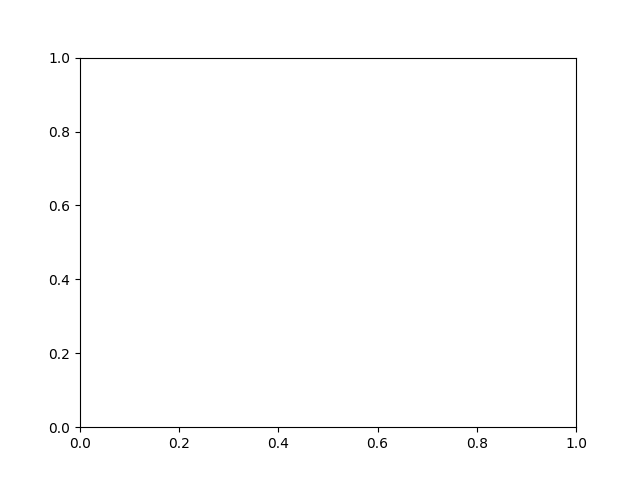

In [8]:
fig, ax = plt.subplots()

def init_double_pendulum():  
  # animation doesn't update when axis bounds not set
  # TODO: file issue with matplotlib
  ax.set_aspect("equal")
  
  plot_limits = np.array([-(l1 + l2) - 0.5, l1 + l2 + 0.5])
  ax.set_xlim(*plot_limits)
  ax.set_ylim(*plot_limits)

def animate_multiple_loop(frame, time_text, bobs, lines):
  t, *soln_states = frame
  time_text.set_text(f"t={t:.2f}")
  
  for i, (theta_1, theta_1_prime, theta_2, theta_2_prime) in enumerate(soln_states):
    bob_1, bob_2 = bobs[i]
    b1_line, b2_line = lines[i]
    
    bob_1.center = np.array([l1 * np.sin(theta_1), -l1 * np.cos(theta_1)])
    bob_2.center = bob_1.center + np.array([l2 * np.sin(theta_2), -l2 * np.cos(theta_2)])
    
    b1_line.set_data([[0, bob_1.center[0]], [0, bob_1.center[1]]])
    b2_line.set_data([[bob_1.center[0], bob_2.center[0]], [bob_1.center[1], bob_2.center[1]]])

def animate_multiple_solutions(solns):
  time_text = plt.text(l1 + l2 + 0.3, l1 + l2 + 0.1, "t=0", ha="right")

  bobs = [[plt.Circle((0, 0), 0.1), plt.Circle((0, 0), 0.1)] for soln in solns]
  for bob_1, bob_2 in bobs:
    ax.add_patch(bob_1)
    ax.add_patch(bob_2)

  lines = [[plt.plot(0, 0, 0, 0)[0], plt.plot(0, 0, 0, 0)[0]] for soln in solns]
  
  return FuncAnimation(fig,
                       func=animate_multiple_loop,
                       init_func=init_double_pendulum,
                       # need to convert frames to list so animation.save() knows how many frames to save
                       # remember, zip object has no len()
                       frames=list(zip(solns[0].t, *[soln.y.T for soln in solns])),
                       fargs=(time_text, bobs, lines),
                       interval=dt*1000,
                       repeat=True,
                       blit=False)

In [9]:
def animation_save_progress_callback(curr_frame, total_frames):
  if curr_frame % 100 == 1:
    print(f"Saving frame {curr_frame} of {total_frames}")

filename = f"dop853/double-pendulum-NEW_m1={m1}_m2={m2}_l1={l1}_l2={l2}_g={g}.mp4"

animation = animate_multiple_solutions([soln_1])
animation.save(filename, progress_callback=animation_save_progress_callback)

Video(filename, width=700, height=700)

Saving frame 1 of 2000
Saving frame 101 of 2000
Saving frame 201 of 2000
Saving frame 301 of 2000
Saving frame 401 of 2000
Saving frame 501 of 2000
Saving frame 601 of 2000
Saving frame 701 of 2000
Saving frame 801 of 2000
Saving frame 901 of 2000
Saving frame 1001 of 2000
Saving frame 1101 of 2000
Saving frame 1201 of 2000
Saving frame 1301 of 2000
Saving frame 1401 of 2000
Saving frame 1501 of 2000
Saving frame 1601 of 2000
Saving frame 1701 of 2000
Saving frame 1801 of 2000
Saving frame 1901 of 2000


# TODO: triple pendulum? n-pendulum?

<IPython.core.display.Javascript object>


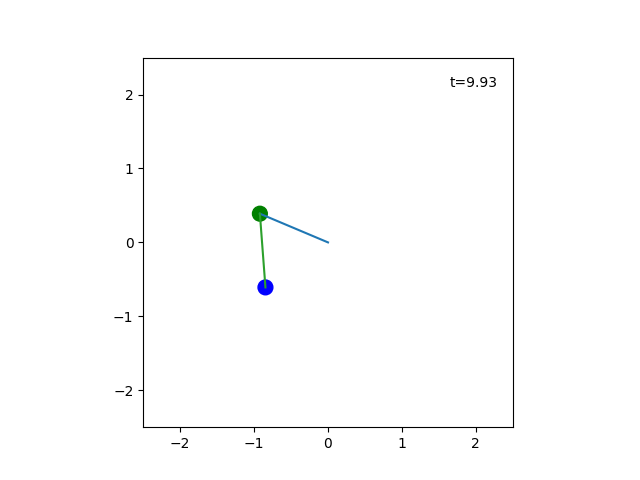

Saving frame 0 of 2000
Saving frame 1 of 2000
Saving frame 2 of 2000
Saving frame 3 of 2000
Saving frame 4 of 2000
Saving frame 5 of 2000
Saving frame 6 of 2000
Saving frame 7 of 2000
Saving frame 8 of 2000
Saving frame 9 of 2000
Saving frame 10 of 2000
Saving frame 11 of 2000
Saving frame 12 of 2000
Saving frame 13 of 2000
Saving frame 14 of 2000
Saving frame 15 of 2000
Saving frame 16 of 2000
Saving frame 17 of 2000
Saving frame 18 of 2000
Saving frame 19 of 2000
Saving frame 20 of 2000
Saving frame 21 of 2000
Saving frame 22 of 2000
Saving frame 23 of 2000
Saving frame 24 of 2000
Saving frame 25 of 2000
Saving frame 26 of 2000
Saving frame 27 of 2000
Saving frame 28 of 2000
Saving frame 29 of 2000
Saving frame 30 of 2000
Saving frame 31 of 2000
Saving frame 32 of 2000
Saving frame 33 of 2000
Saving frame 34 of 2000
Saving frame 35 of 2000
Saving frame 36 of 2000
Saving frame 37 of 2000
Saving frame 38 of 2000
Saving frame 39 of 2000
Saving frame 40 of 2000
Saving frame 41 of 2000
Sa

Saving frame 337 of 2000
Saving frame 338 of 2000
Saving frame 339 of 2000
Saving frame 340 of 2000
Saving frame 341 of 2000
Saving frame 342 of 2000
Saving frame 343 of 2000
Saving frame 344 of 2000
Saving frame 345 of 2000
Saving frame 346 of 2000
Saving frame 347 of 2000
Saving frame 348 of 2000
Saving frame 349 of 2000
Saving frame 350 of 2000
Saving frame 351 of 2000
Saving frame 352 of 2000
Saving frame 353 of 2000
Saving frame 354 of 2000
Saving frame 355 of 2000
Saving frame 356 of 2000
Saving frame 357 of 2000
Saving frame 358 of 2000
Saving frame 359 of 2000
Saving frame 360 of 2000
Saving frame 361 of 2000
Saving frame 362 of 2000
Saving frame 363 of 2000
Saving frame 364 of 2000
Saving frame 365 of 2000
Saving frame 366 of 2000
Saving frame 367 of 2000
Saving frame 368 of 2000
Saving frame 369 of 2000
Saving frame 370 of 2000
Saving frame 371 of 2000
Saving frame 372 of 2000
Saving frame 373 of 2000
Saving frame 374 of 2000
Saving frame 375 of 2000
Saving frame 376 of 2000


Saving frame 667 of 2000
Saving frame 668 of 2000
Saving frame 669 of 2000
Saving frame 670 of 2000
Saving frame 671 of 2000
Saving frame 672 of 2000
Saving frame 673 of 2000
Saving frame 674 of 2000
Saving frame 675 of 2000
Saving frame 676 of 2000
Saving frame 677 of 2000
Saving frame 678 of 2000
Saving frame 679 of 2000
Saving frame 680 of 2000
Saving frame 681 of 2000
Saving frame 682 of 2000
Saving frame 683 of 2000
Saving frame 684 of 2000
Saving frame 685 of 2000
Saving frame 686 of 2000
Saving frame 687 of 2000
Saving frame 688 of 2000
Saving frame 689 of 2000
Saving frame 690 of 2000
Saving frame 691 of 2000
Saving frame 692 of 2000
Saving frame 693 of 2000
Saving frame 694 of 2000
Saving frame 695 of 2000
Saving frame 696 of 2000
Saving frame 697 of 2000
Saving frame 698 of 2000
Saving frame 699 of 2000
Saving frame 700 of 2000
Saving frame 701 of 2000
Saving frame 702 of 2000
Saving frame 703 of 2000
Saving frame 704 of 2000
Saving frame 705 of 2000
Saving frame 706 of 2000


Saving frame 997 of 2000
Saving frame 998 of 2000
Saving frame 999 of 2000
Saving frame 1000 of 2000
Saving frame 1001 of 2000
Saving frame 1002 of 2000
Saving frame 1003 of 2000
Saving frame 1004 of 2000
Saving frame 1005 of 2000
Saving frame 1006 of 2000
Saving frame 1007 of 2000
Saving frame 1008 of 2000
Saving frame 1009 of 2000
Saving frame 1010 of 2000
Saving frame 1011 of 2000
Saving frame 1012 of 2000
Saving frame 1013 of 2000
Saving frame 1014 of 2000
Saving frame 1015 of 2000
Saving frame 1016 of 2000
Saving frame 1017 of 2000
Saving frame 1018 of 2000
Saving frame 1019 of 2000
Saving frame 1020 of 2000
Saving frame 1021 of 2000
Saving frame 1022 of 2000
Saving frame 1023 of 2000
Saving frame 1024 of 2000
Saving frame 1025 of 2000
Saving frame 1026 of 2000
Saving frame 1027 of 2000
Saving frame 1028 of 2000
Saving frame 1029 of 2000
Saving frame 1030 of 2000
Saving frame 1031 of 2000
Saving frame 1032 of 2000
Saving frame 1033 of 2000
Saving frame 1034 of 2000
Saving frame 10

Saving frame 1319 of 2000
Saving frame 1320 of 2000
Saving frame 1321 of 2000
Saving frame 1322 of 2000
Saving frame 1323 of 2000
Saving frame 1324 of 2000
Saving frame 1325 of 2000
Saving frame 1326 of 2000
Saving frame 1327 of 2000
Saving frame 1328 of 2000
Saving frame 1329 of 2000
Saving frame 1330 of 2000
Saving frame 1331 of 2000
Saving frame 1332 of 2000
Saving frame 1333 of 2000
Saving frame 1334 of 2000
Saving frame 1335 of 2000
Saving frame 1336 of 2000
Saving frame 1337 of 2000
Saving frame 1338 of 2000
Saving frame 1339 of 2000
Saving frame 1340 of 2000
Saving frame 1341 of 2000
Saving frame 1342 of 2000
Saving frame 1343 of 2000
Saving frame 1344 of 2000
Saving frame 1345 of 2000
Saving frame 1346 of 2000
Saving frame 1347 of 2000
Saving frame 1348 of 2000
Saving frame 1349 of 2000
Saving frame 1350 of 2000
Saving frame 1351 of 2000
Saving frame 1352 of 2000
Saving frame 1353 of 2000
Saving frame 1354 of 2000
Saving frame 1355 of 2000
Saving frame 1356 of 2000
Saving frame

Saving frame 1644 of 2000
Saving frame 1645 of 2000
Saving frame 1646 of 2000
Saving frame 1647 of 2000
Saving frame 1648 of 2000
Saving frame 1649 of 2000
Saving frame 1650 of 2000
Saving frame 1651 of 2000
Saving frame 1652 of 2000
Saving frame 1653 of 2000
Saving frame 1654 of 2000
Saving frame 1655 of 2000
Saving frame 1656 of 2000
Saving frame 1657 of 2000
Saving frame 1658 of 2000
Saving frame 1659 of 2000
Saving frame 1660 of 2000
Saving frame 1661 of 2000
Saving frame 1662 of 2000
Saving frame 1663 of 2000
Saving frame 1664 of 2000
Saving frame 1665 of 2000
Saving frame 1666 of 2000
Saving frame 1667 of 2000
Saving frame 1668 of 2000
Saving frame 1669 of 2000
Saving frame 1670 of 2000
Saving frame 1671 of 2000
Saving frame 1672 of 2000
Saving frame 1673 of 2000
Saving frame 1674 of 2000
Saving frame 1675 of 2000
Saving frame 1676 of 2000
Saving frame 1677 of 2000
Saving frame 1678 of 2000
Saving frame 1679 of 2000
Saving frame 1680 of 2000
Saving frame 1681 of 2000
Saving frame

Saving frame 1968 of 2000
Saving frame 1969 of 2000
Saving frame 1970 of 2000
Saving frame 1971 of 2000
Saving frame 1972 of 2000
Saving frame 1973 of 2000
Saving frame 1974 of 2000
Saving frame 1975 of 2000
Saving frame 1976 of 2000
Saving frame 1977 of 2000
Saving frame 1978 of 2000
Saving frame 1979 of 2000
Saving frame 1980 of 2000
Saving frame 1981 of 2000
Saving frame 1982 of 2000
Saving frame 1983 of 2000
Saving frame 1984 of 2000
Saving frame 1985 of 2000
Saving frame 1986 of 2000
Saving frame 1987 of 2000
Saving frame 1988 of 2000
Saving frame 1989 of 2000
Saving frame 1990 of 2000
Saving frame 1991 of 2000
Saving frame 1992 of 2000
Saving frame 1993 of 2000
Saving frame 1994 of 2000
Saving frame 1995 of 2000
Saving frame 1996 of 2000
Saving frame 1997 of 2000
Saving frame 1998 of 2000
Saving frame 1999 of 2000


In [112]:
fig, ax = plt.subplots()

# time_text = plt.annotate("t=0", (0.84, 0.93), xycoords="axes fraction")
time_text = plt.text(l1 + l2 + 0.3, l1 + l2 + 0.1, "t=0", ha="right")

bob_1 = plt.Circle((0, 0), 0.1, color="green")
bob_2 = plt.Circle((0, 0), 0.1, color="blue")
ax.add_patch(bob_1)
ax.add_patch(bob_2)

b1_line = plt.plot(0, 0, 0, 0)[0]
b2_line = plt.plot(0, 0, 0, 0)[0]

ax.set_aspect("equal")

def init_double_pendulum():
  # animation doesn't update when axis bounds not set
  # TODO: file issue with matplotlib
  plot_limits = np.array([-(l1 + l2) - 0.5, l1 + l2 + 0.5])
  ax.set_xlim(*plot_limits)
  ax.set_ylim(*plot_limits)

def animate_double_pendulum(frame):
  t, (theta_1, theta_1_prime, theta_2, theta_2_prime) = frame
  
  b1_coords = np.array([l1 * np.sin(theta_1), -l1 * np.cos(theta_1)])
  b2_coords = b1_coords + np.array([l2 * np.sin(theta_2), -l2 * np.cos(theta_2)])
  
  bob_1.center = b1_coords
  bob_2.center = b2_coords

  b1_line.set_data([[0, b1_coords[0]], [0, b1_coords[1]]])
  b2_line.set_data([[b1_coords[0], b2_coords[0]], [b1_coords[1], b2_coords[1]]])

#   print(frame[0])
  time_text.set_text(f"t={t:.2f}")

def animate_soln(soln):
  # return FuncAnimation object to prevent it from being garbage-collected
  return FuncAnimation(fig,
                       func=animate_double_pendulum,
                       init_func=init_double_pendulum,
                       # need to convert frames to list so animation.save() knows how many frames to save
                       # remember, zip object has no len()
                       frames=list(zip(soln.t, soln.y.T)),
                       interval=dt*1000,
                       repeat=True,
                       blit=False)

animation = animate_soln(soln_1)
animation.save(f"double-pendulum_m1={m1}_m2={m2}_l1={l1}_l2={l2}_g={g}.mp4",
               progress_callback=lambda i, n: print(f"Saving frame {i} of {n}"))
plt.show()